In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [33]:
df = pd.read_csv('./data/000001_平安银行.csv')
df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2023-01-03,3087.51,3116.51,3119.86,3073.05,281370362,3.313921e+11,1.52,0.88,27.25,0.62
1,2023-01-04,3117.57,3123.52,3129.09,3109.45,273313626,3.163912e+11,0.63,0.22,7.01,0.60
2,2023-01-05,3132.76,3155.22,3159.43,3130.23,257003018,3.356359e+11,0.93,1.01,31.70,0.56
3,2023-01-06,3155.07,3157.64,3170.74,3151.84,257380255,3.385398e+11,0.60,0.08,2.42,0.56
4,2023-01-09,3169.37,3176.08,3183.58,3165.43,258115218,3.426938e+11,0.57,0.58,18.44,0.57
...,...,...,...,...,...,...,...,...,...,...,...
217,2023-11-27,3038.19,3031.70,3038.36,3015.01,310517868,3.507058e+11,0.77,-0.30,-9.27,0.68
218,2023-11-28,3028.60,3038.55,3039.69,3020.23,268920746,3.173037e+11,0.64,0.23,6.85,0.59
219,2023-11-29,3038.46,3021.69,3038.98,3017.66,277956448,3.221412e+11,0.70,-0.55,-16.86,0.61
220,2023-11-30,3021.10,3029.67,3030.91,3013.77,282945357,3.267557e+11,0.57,0.26,7.98,0.62


In [34]:
df['成交量'].to_numpy()

array([281370362, 273313626, 257003018, 257380255, 258115218, 232984175,
       237742869, 216671305, 220226897, 306749549, 226592230, 212109730,
       226465030, 273219182, 353325829, 300162957, 339509410, 333413133,
       293342814, 267053107, 250946450, 234530481, 254754529, 260626926,
       297213188, 270974168, 269939123, 380863545, 278451237, 325007733,
       324409449, 255403985, 262324304, 234206306, 242855344, 251625032,
       318398704, 328520016, 343996919, 340530446, 389957956, 260443547,
       264021859, 281135410, 294928087, 319906033, 305168798, 327389632,
       343001022, 392517391, 301810779, 290840462, 306118393, 324513337,
       337861206, 295682660, 296900508, 299898295, 283613746, 357676775,
       385871617, 327155424, 283032247, 340819845, 320566055, 343025315,
       347862106, 338299275, 402809926, 348399486, 346123443, 350354965,
       387395098, 354255626, 380895729, 357917842, 341590534, 401554785,
       483364916, 436504494, 534103659, 573013309, 

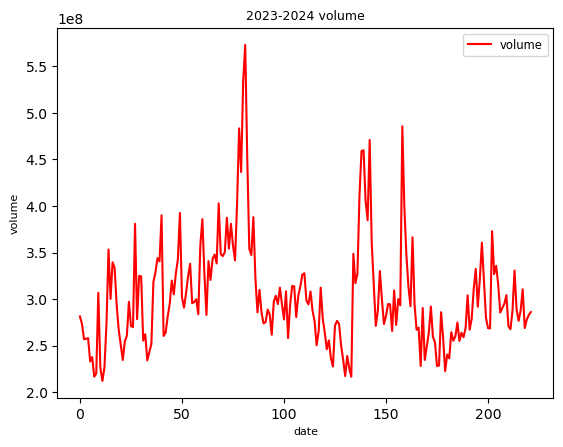

In [35]:
# data['成交量'].plot(grid=True,color='red',label='600000.SH')
plt.plot(df['成交量'].to_numpy(),color='red',label='volume')
plt.title('2023-2024 volume', fontsize='9')
plt.ylabel('volume', fontsize='8')
plt.xlabel('date', fontsize='8')
plt.legend(loc='best',fontsize='small')
plt.show()

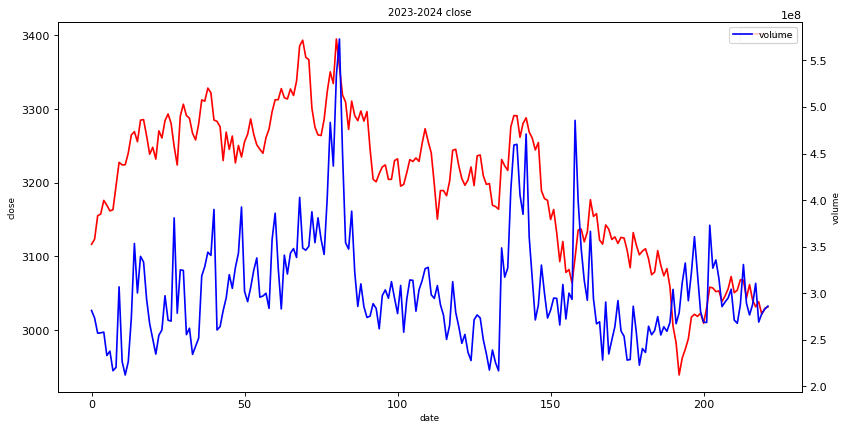

In [36]:
# 绘制股票在2016年3月份—2017年12月份的日收盘价和日成交量的时间序列图，因为它们的数值差异很大，所以采用两套纵坐标系来做图。
plt.figure(figsize=(12,6), dpi=80)
plt.plot(df['收盘'].to_numpy(),color='red',label='close')
plt.title('2023-2024 close', fontsize='9')
plt.ylabel('close', fontsize='8')
plt.xlabel('date', fontsize='8')
plt.legend(loc='best',fontsize='small')
plt.twinx()
plt.plot(df['成交量'].to_numpy(),color='blue',label='volume')
plt.ylabel('volume', fontsize='8')
plt.legend(loc='best',fontsize='small')
plt.show()

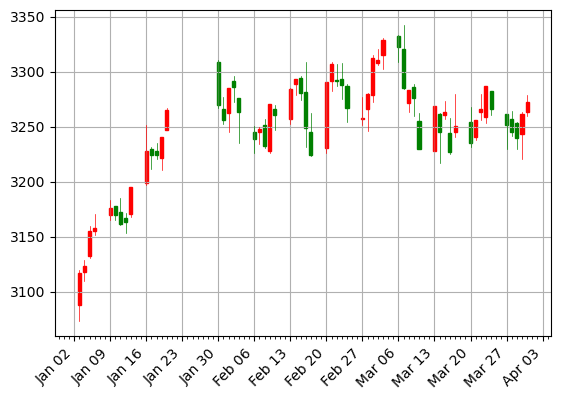

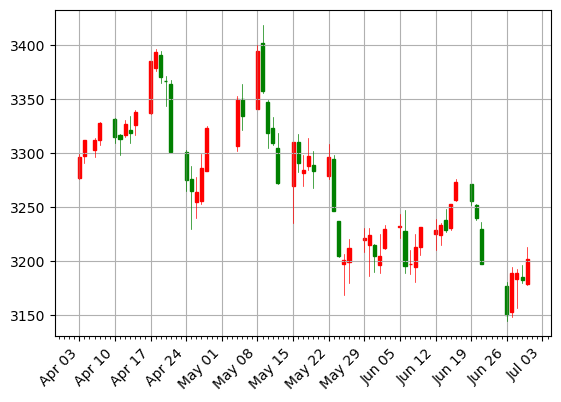

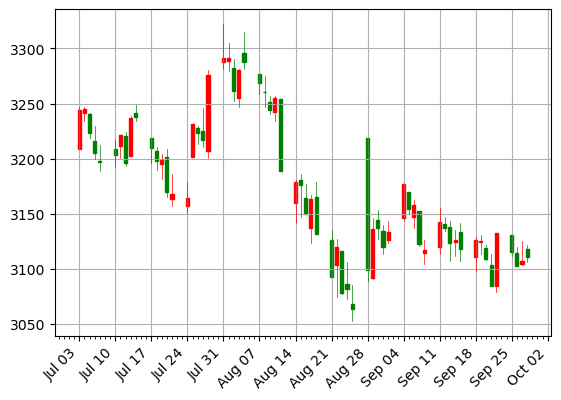

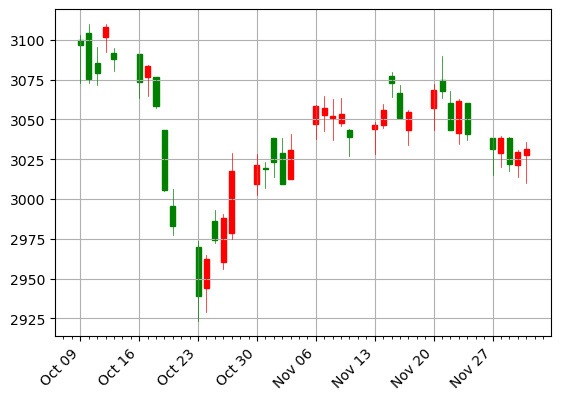

In [37]:
import numpy as np
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY,date2num

def pandas_candlestick_ohlc(stock_data, otherseries=None):
    # 设置绘图参数，主要是坐标轴
    mondays = WeekdayLocator(MONDAY)
    alldays = DayLocator()
    dayFormatter = DateFormatter('%d')

    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if stock_data.index[-1] - stock_data.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
    ax.grid(True)

    # 创建K线图
    stock_array = np.array(stock_data.reset_index()[['date','open','high','low','close']])
    stock_array[:,0] = date2num(stock_array[:,0])
    candlestick_ohlc(ax, stock_array, colorup = "red", colordown="green", width=0.6)

    # 可同时绘制其他折线图
    if otherseries is not None:
        for each in otherseries:
            plt.plot(stock_data[each], label=each)
        plt.legend()

    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

stock_data = df.copy()
stock_data['date'] = pd.to_datetime(stock_data['日期'])
stock_data = stock_data.set_index('date')
# 开盘	收盘	最高	最低	成交量	成交额	振幅	涨跌幅	涨跌额	换手率
stock_data.columns=['data', 'open','close','high','low','volume','amount','amplitude','pct_change','change','turnover']
# 设置日期，以三个月为一个周期
pandas_candlestick_ohlc(stock_data['2023-01-01':'2023-03-31'])
pandas_candlestick_ohlc(stock_data['2023-04-01':'2023-06-30'])
pandas_candlestick_ohlc(stock_data['2023-07-01':'2023-09-30'])
pandas_candlestick_ohlc(stock_data['2023-10-01':'2023-12-31'])

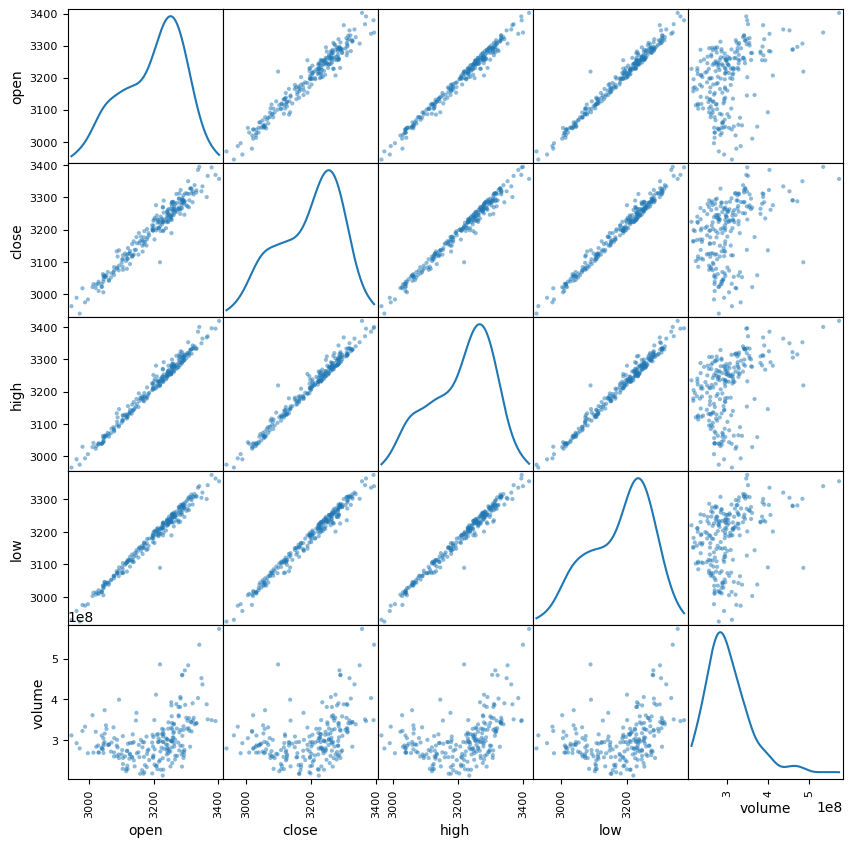

In [38]:
# 相关性分析
from pandas.plotting import scatter_matrix
data = df.copy()
data.columns=['data', 'open','close','high','low','volume','amount','amplitude','pct_change','change','turnover']
scatter_matrix(data[['open','close','high','low','volume']],figsize=(10,10),diagonal='kde')
plt.show()

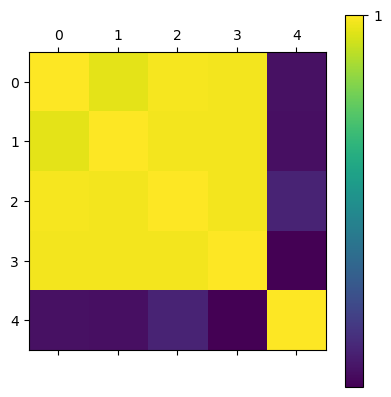

In [39]:
# 相关系数分析['volume','market_value','turnover','pe','pb']
cov=np.corrcoef(data[['open','close','high','low','volume']],rowvar=0)
img=plt.matshow(cov)
plt.colorbar(img,ticks=[-1,0,1])
plt.show()

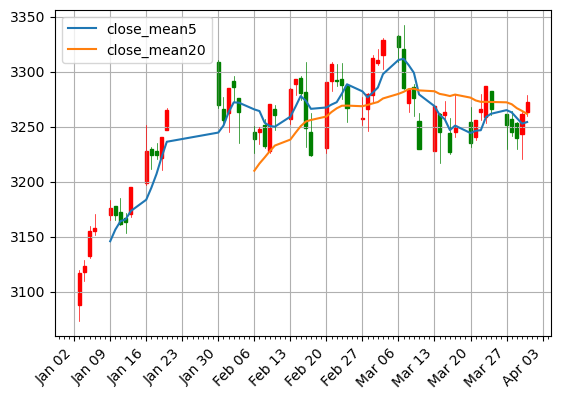

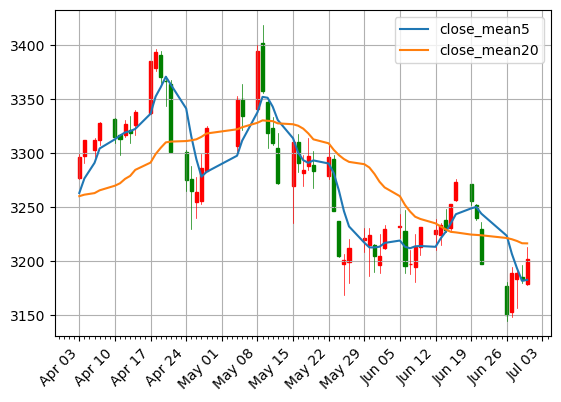

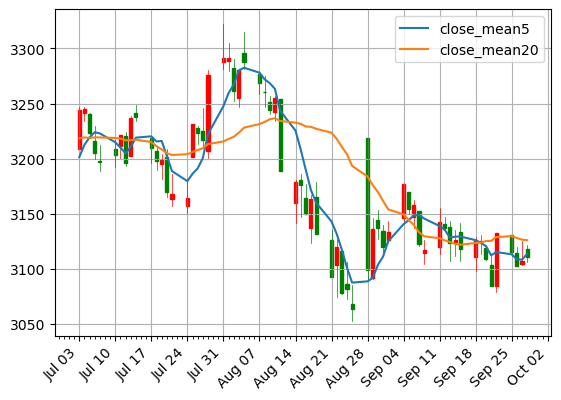

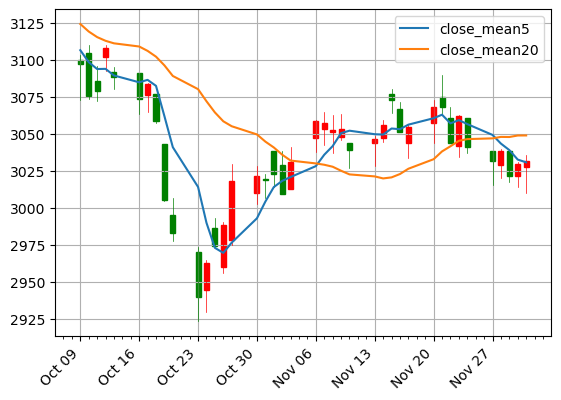

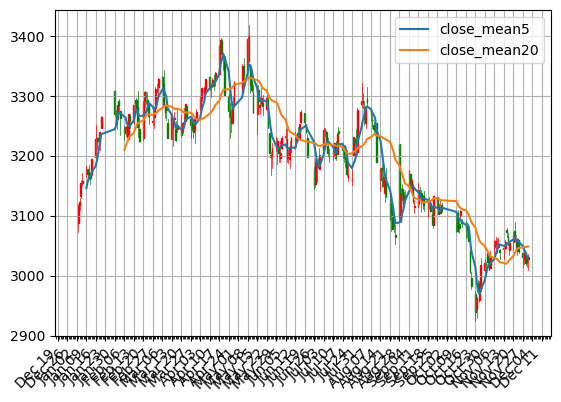

In [42]:
stock_data = df.copy()
stock_data = df.copy()
stock_data['date'] = pd.to_datetime(stock_data['日期'])
stock_data = stock_data.set_index('date')
# 开盘	收盘	最高	最低	成交量	成交额	振幅	涨跌幅	涨跌额	换手率
stock_data.columns=['data', 'open','close','high','low','volume','amount','amplitude','pct_change','change','turnover']
stock_data['close_mean5']=np.round(stock_data['close'].rolling(window=5,center=False).mean(),2)
stock_data['close_mean20']=np.round(stock_data['close'].rolling(window=20,center=False).mean(),2)
pandas_candlestick_ohlc(stock_data['2023-01-01':'2023-03-31'],otherseries=['close_mean5','close_mean20'])
pandas_candlestick_ohlc(stock_data['2023-04-01':'2023-06-30'],otherseries=['close_mean5','close_mean20'])
pandas_candlestick_ohlc(stock_data['2023-07-01':'2023-09-30'],otherseries=['close_mean5','close_mean20'])
pandas_candlestick_ohlc(stock_data['2023-10-01':'2023-12-31'],otherseries=['close_mean5','close_mean20'])
pandas_candlestick_ohlc(stock_data,otherseries=['close_mean5','close_mean20'])